# Predict if a tumor is benign or maligant

In [1]:
#Is this a classification or regression problem ?
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)
print(f"Shape of dataframe {df.shape}")

Shape of dataframe (569, 30)


In [2]:
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']
df = df[features] # select just these features
print("target[0:30] =", y[0:30]) # show 30 values of malignant/benign target

target[0:30] = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


In [3]:
# Create train test split, with 15% data reserved from testing.
from sklearn.model_selection import train_test_split
#  one line code here.
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

In [4]:
# Create a RandomForestClassifier since this is a classification problem.
from sklearn.ensemble import RandomForestClassifier
# one line of code here.
cl = RandomForestClassifier(n_estimators=300)
# Fit your model.
# One line of code here.
cl.fit(X_train, y_train)

validation_e = cl.score(X_test, y_test)
print(f"{validation_e*100:.2f}% correct")

95.35% correct


/Users/anilkumarpanda/SoftwareInstalls/anaconda/envs/ml_course/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


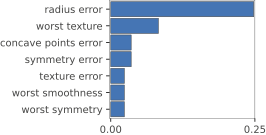

In [5]:
# Calculate the feature importances.
from rfpimp import *
I = importances(cl,X_test, y_test)
plot_importances(I, color='#4575b4',vscale=1.4)